In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Collecting

In [ ]:
url = "https://drive.google.com/uc?id=1hsIq184i-Mi9rrN6KJjAyAXCml_c3BeT"
#https://drive.google.com/file/d/1hsIq184i-Mi9rrN6KJjAyAXCml_c3BeT/view?usp=sharing
cols_name = [
    'customerID',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges',
    'Churn'
]

df = pd.read_csv(url)

In [ ]:
#Melihat informasi dasar dataset
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data dan missing values:")
print(df.info())
print("\nCek 5 data teratas:")
print(df.head())

Jumlah baris dan kolom: (7043, 21)

Tipe data dan missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Distribusi Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


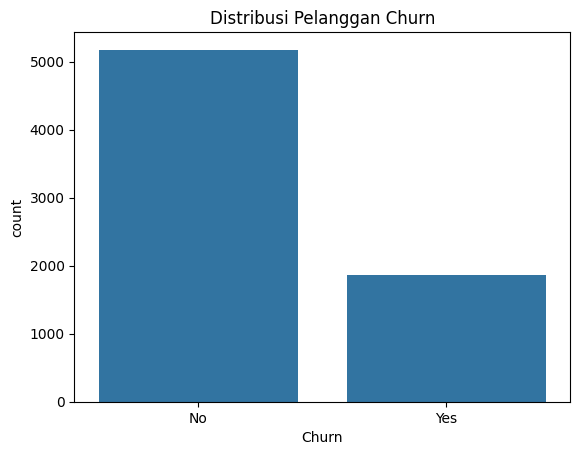

In [ ]:
#Data Understanding
#Statistik deskriptif
df.describe()
# Distribusi target
print("\nDistribusi Churn:")
print(df['Churn'].value_counts(normalize=True))

sns.countplot(x='Churn', data=df)
plt.title("Distribusi Pelanggan Churn")
plt.show()

#Data Preprocessing

In [ ]:
missing_values = df.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Series([], dtype: int64)


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Data Cleaning

# Hapus tidak relevan
df.drop(columns=['customerID'], inplace=True)

#transformasi kolom TotalCharges dari object ke float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Tangani missing values (isi NaN TotalCharges dengan 0)
df['TotalCharges'].fillna(0, inplace=True)

# Cek ulang missing values
print("\nJumlah missing setelah cleaning:")
print(df.isnull().sum())


Jumlah missing setelah cleaning:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-956797560.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])#meubah kolom Churn (yang berisi data kategori seperti "Yes" dan "No")
df_encoded = pd.get_dummies(df.drop(['Churn'], axis=1), drop_first=True)
df_encoded['Churn'] = df['Churn']
print("\nData setelah encoding:")
df_encoded.head()


Data setelah encoding:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,0
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,0
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,1
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,1


In [ ]:
#Split Data Training & Testing
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)  # fitur (semua kolom kecuali target)
y = df_encoded['Churn']               # target (kolom churn)

# Bagi data 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])


Jumlah data training: 5634
Jumlah data testing : 1409


In [ ]:
#Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("\nData akhir siap untuk modeling:")
display(df_encoded.head())


Data akhir siap untuk modeling:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,-1.277445,-1.160323,-0.992611,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,0
1,0,0.066327,-0.259629,-0.172165,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,0
2,0,-1.236724,-0.362660,-0.958066,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,1
3,0,0.514251,-0.746535,-0.193672,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
4,0,-1.236724,0.197365,-0.938874,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,1


In [ ]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("\nData akhir siap untuk modeling:")
print(df_encoded.head())


Data akhir siap untuk modeling:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.277445       -1.160323     -0.992611        False   
1              0  0.066327       -0.259629     -0.172165         True   
2              0 -1.236724       -0.362660     -0.958066         True   
3              0  0.514251       -0.746535     -0.193672         True   
4              0 -1.236724        0.197365     -0.938874        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

print("\nModel Decision Tree berhasil dilatih!")


Model Decision Tree berhasil dilatih!



##cart model

In [ ]:
cart_model = DecisionTreeClassifier() #sklarn
cart_model.fit(X_train, y_train)

DecisionTreeClassifier()

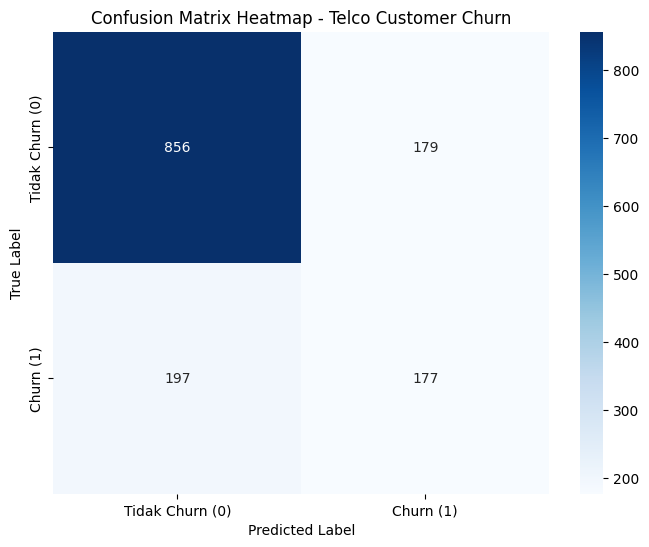

In [ ]:
# Prediksi data uji
y_pred = cart_model.predict(X_test)

# Hitung confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Nilai sebenarnya y_test
# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Tidak Churn (0)', 'Churn (1)'],
    yticklabels=['Tidak Churn (0)', 'Churn (1)']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap - Telco Customer Churn')
plt.show()

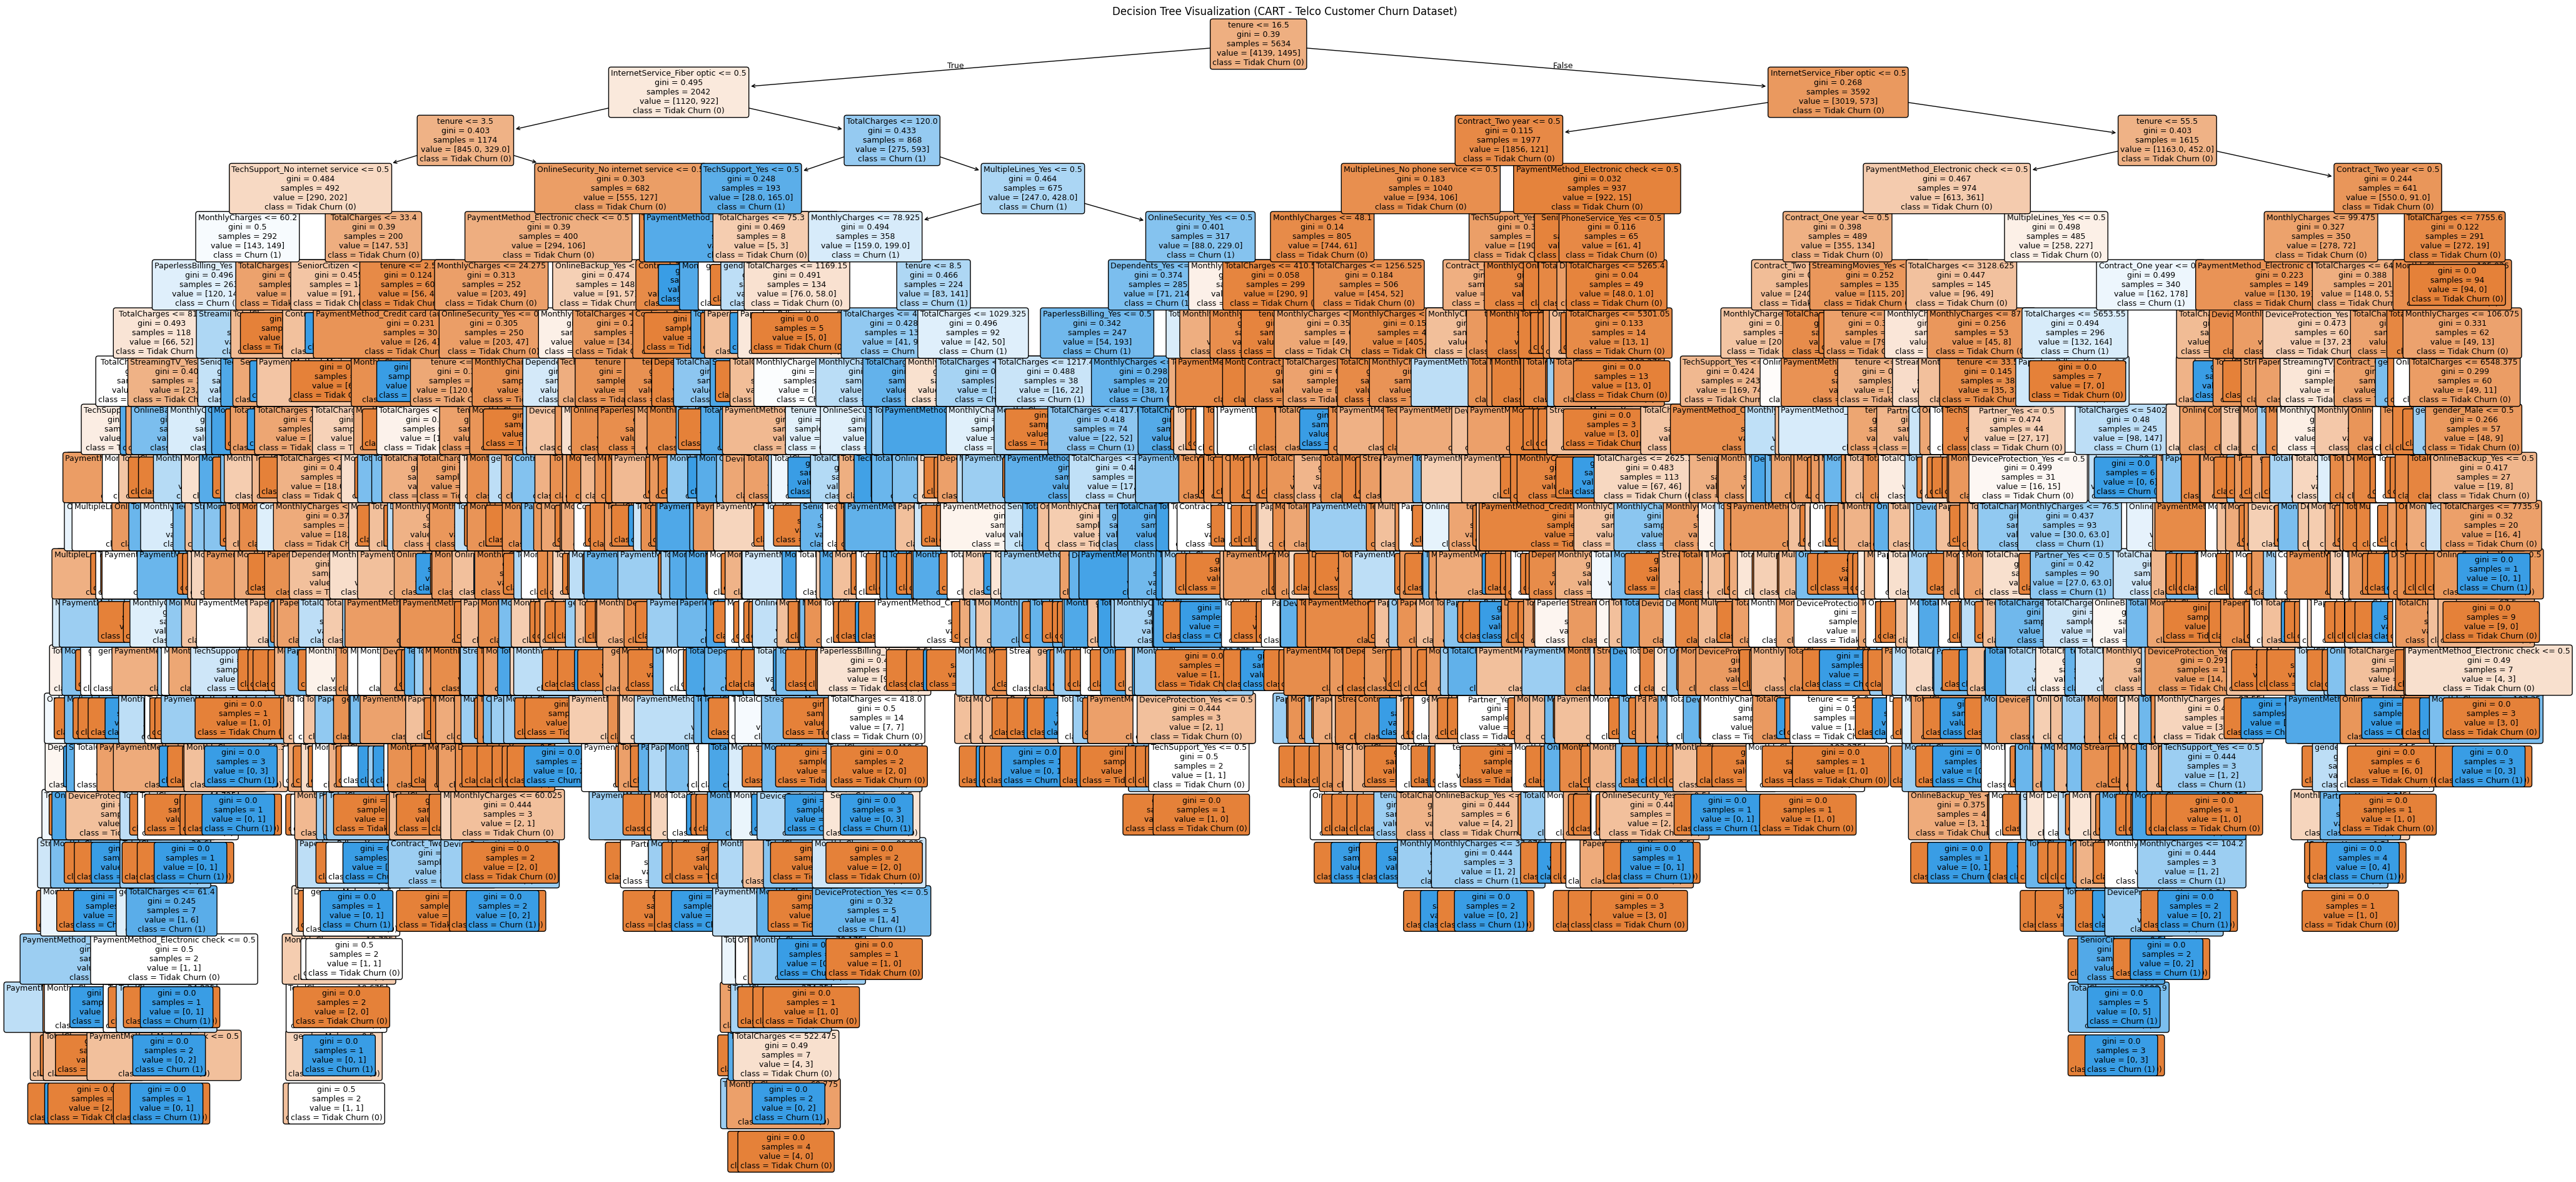

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 24))
plot_tree(
    cart_model,
    feature_names=X.columns,
    class_names=['Tidak Churn (0)', 'Churn (1)'],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree Visualization (CART - Telco Customer Churn Dataset)")
plt.show()


In [ ]:
y_pred_id3 = id3_model.predict(X_test)

In [ ]:
#Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n=== Evaluasi Model ID3 ===")
print("Accuracy :", accuracy_score(y_test, y_pred_id3))
print("Precision (macro):", precision_score(y_test, y_pred_id3, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_id3, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_id3, average='macro'))


=== Evaluasi Model ID3 ===
Accuracy : 0.730305180979418
Precision (macro): 0.6555182838236718
Recall (macro): 0.6576170916324369
F1 Score (macro): 0.6565336987257453


In [ ]:
#Laporan Klasifikasi
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred_id3))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1035
           1       0.49      0.50      0.50       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

